# Project 1 – Iris Dataset

## Task: Predict the class of iris plant

### 1. Exploratory Data Analysis

In [21]:
import pandas as pd

#read Dataset
df = pd.read_excel("iris.xlsx")

In [22]:
print (df.describe())

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [23]:
print (df.isnull().sum)

<bound method DataFrame.sum of      sepal.length  sepal.width  petal.length  petal.width  variety
0           False        False         False        False    False
1           False        False         False        False    False
2           False        False         False        False    False
3           False        False         False        False    False
4           False        False         False        False    False
..            ...          ...           ...          ...      ...
145         False        False         False        False    False
146         False        False         False        False    False
147         False        False         False        False    False
148         False        False         False        False    False
149         False        False         False        False    False

[150 rows x 5 columns]>


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
columns = df.columns

In [26]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

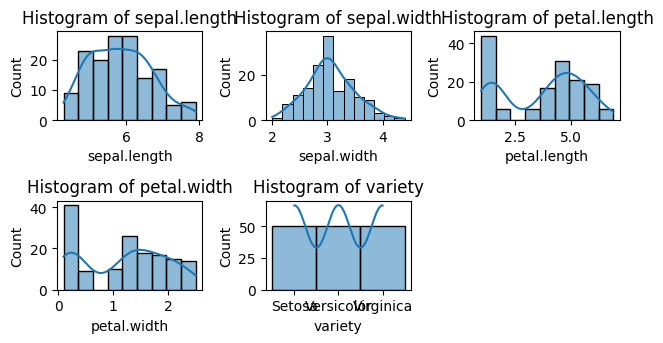

In [27]:
for i, column in enumerate(columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

### 2. Encode the target variable ie convert it to numeric type

In [28]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

As we can see the targe variables are alredy in numnerical, there is no need to convert it!

### 3. Splitting dataset into 80:10:10 and 60:20:20 train, validation, and test sets

In [29]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop(columns=['variety'])
y = df['variety']

#### Splitting the Iris Dataset into 80:10:10

In [34]:
# Split the data into training (80%) and temporary (20%) sets:
X_train_80, X_temp, y_train_80, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
#Split the temporary set into validation (10%) and test (10%) sets:
X_val_10, X_test_10, y_val_10, y_test_10 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#### Splitting the Iris Dataset into 60:20:20

In [40]:
#Split the data into training (60%) and temporary (40%) sets:
X_train_60, X_temp, y_train_60, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [41]:
#Split the temporary set into validation (20%) and test (20%) sets:
X_val_20, X_test_20, y_val_20, y_test_20 = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

### 4.  Implement Grid Search CV to find optimal hyperparameters for any 3 algorithms(out of LR, SVM, MLP, RF, Boosting): 6pts

# MLP, RF, SVM

In [ ]:
# MLP, RF, SVM

##### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [46]:
#creating models
lr = LogisticRegression()

In [47]:
# Implement Grid Search CV for model
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, n_jobs=-1, verbose=1)

In [48]:
#Model fit
grid_search_lr.fit(X_train_60, y_train_60)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\Balddudehere\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'saga']},
             verbose=1)

In [49]:
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'saga'}


In [57]:
from sklearn.metrics import accuracy_score, classification_report

#Evaluationg model with best parameter

best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_20)

print("Accuracy of Logistic Regression:", accuracy_score(y_test_20, y_pred_lr))
print("Classification Report for Logistic Regression:\n", classification_report(y_test_20, y_pred_lr))

Accuracy of Logistic Regression: 0.9666666666666667
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.90      0.95        10
   Virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



##### Support Vector Machine (SVM)

In [53]:
from sklearn.svm import SVC

# Define the parameter grid for SVM
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [54]:
svc = SVC()

In [58]:
# Implement Grid Search CV for model
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, n_jobs=-1, verbose=1)

#fir the model
grid_search_svc.fit(X_train_60, y_train_60)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=1)

In [59]:
print("Best parameters for SVM:", grid_search_svc.best_params_)

Best parameters for SVM: {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [60]:
best_svc = grid_search_svc.best_estimator_
y_pred_svc = best_svc.predict(X_test_20)

print("Accuracy of SVM:", accuracy_score(y_test_20, y_pred_svc))
print("Classification Report for SVM:\n", classification_report(y_test_20, y_pred_svc))

Accuracy of SVM: 1.0
Classification Report for SVM:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00        10
   Virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier()

In [63]:
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, verbose=1)

grid_search_rf.fit(X_train_60, y_train_60)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [64]:
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [65]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_20)

print("Accuracy of Random Forest:", accuracy_score(y_test_20, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test_20, y_pred_rf))

Accuracy of Random Forest: 0.9
Classification Report for Random Forest:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.77      1.00      0.87        10
   Virginica       1.00      0.70      0.82        10

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



5. Analyze the results on the validation set and test set and mention which model performed the best and why?: 2pts
6. Provide observations and reasoning for visualizations and results included. 2pts
7. Compare the performance of models. What was the best proportion from the set of experiments you conducted?: 2pts